<a href="https://colab.research.google.com/github/jsooyoun/Basic-ML-Practice/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import CIFAR10
cifar = CIFAR10(root='data', train=True, download=True)

Files already downloaded and verified


#1

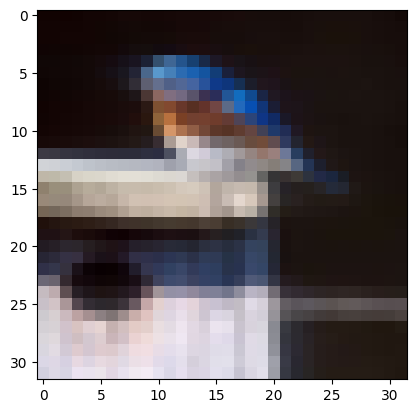

In [ ]:
(x, y) = cifar[13]
plt.imshow(x)

#2

In [ ]:
X = np.asarray(x)
X.shape

(32, 32, 3)

This shapes represents a 3 dimensional matrix. Its length and width are both 32, represented by the 32 pixels in the image along the x and y axis. The height of the matrix is represented by the 3 color channels used to display images (red, green, blue).

#3

In [ ]:
print(X.dtype)
X_range = np.max(X) - np.min(X)
print(X_range )

uint8
244


#4

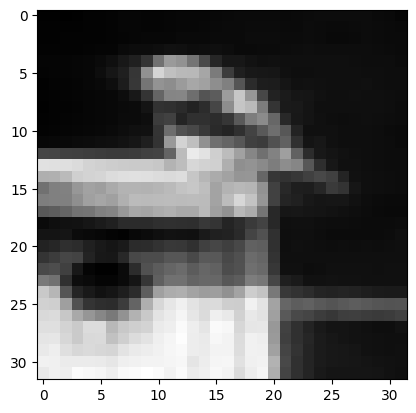

In [ ]:
blueX = X[:, :, 2]
plt.imshow(blueX, cmap='gray')

#5

In [ ]:
from torchvision.transforms import ToTensor
totensor = ToTensor()
tensor = totensor(x)
tensor

tensor([[[0.0667, 0.0667, 0.0667,  ..., 0.0902, 0.0863, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0941, 0.0902, 0.0863],
         [0.0706, 0.0706, 0.0745,  ..., 0.0941, 0.0902, 0.0902],
         ...,
         [0.8510, 0.8863, 0.8235,  ..., 0.1294, 0.1255, 0.1294],
         [0.8588, 0.8706, 0.8392,  ..., 0.1373, 0.1333, 0.1294],
         [0.8235, 0.8667, 0.8431,  ..., 0.1412, 0.1333, 0.1255]],

        [[0.0118, 0.0118, 0.0078,  ..., 0.0510, 0.0471, 0.0353],
         [0.0157, 0.0157, 0.0157,  ..., 0.0549, 0.0510, 0.0471],
         [0.0157, 0.0157, 0.0196,  ..., 0.0549, 0.0510, 0.0510],
         ...,
         [0.8392, 0.8588, 0.7882,  ..., 0.0941, 0.0902, 0.0941],
         [0.8431, 0.8431, 0.8157,  ..., 0.1020, 0.0980, 0.0941],
         [0.8157, 0.8471, 0.8314,  ..., 0.1059, 0.0980, 0.0902]],

        [[0.0078, 0.0078, 0.0039,  ..., 0.0431, 0.0392, 0.0275],
         [0.0118, 0.0118, 0.0118,  ..., 0.0471, 0.0431, 0.0392],
         [0.0118, 0.0118, 0.0157,  ..., 0.0471, 0.0431, 0.

In [ ]:
tensor.dtype

torch.float32

In [ ]:
tensor.shape

torch.Size([3, 32, 32])

#6

tensor([[0.0078, 0.0078, 0.0039,  ..., 0.0431, 0.0392, 0.0275],
        [0.0118, 0.0118, 0.0118,  ..., 0.0471, 0.0431, 0.0392],
        [0.0118, 0.0118, 0.0157,  ..., 0.0471, 0.0431, 0.0431],
        ...,
        [0.8745, 0.8902, 0.8353,  ..., 0.0667, 0.0627, 0.0667],
        [0.9020, 0.8980, 0.8824,  ..., 0.0745, 0.0706, 0.0667],
        [0.8745, 0.8980, 0.8902,  ..., 0.0784, 0.0706, 0.0627]])

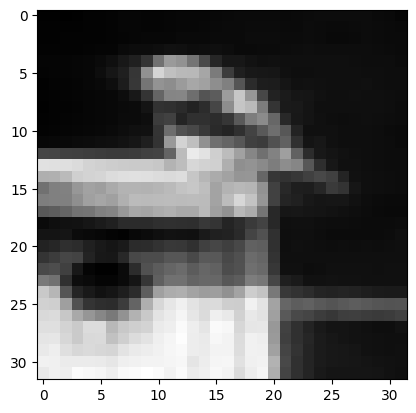

In [ ]:
bluetotensor = tensor[2, :, :]
plt.imshow(bluetotensor, cmap='gray')
bluetotensor

#7

In [ ]:
tensor_range = tensor.max().item() - tensor.min().item()
tensor_range

0.95686274766922

#8

In [ ]:
from torchvision.transforms import Normalize
normalize = Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

normalized_tensor = normalize(tensor)

min_value = normalized_tensor.min().item()
max_value = normalized_tensor.max().item()

print(min_value)
print(max_value)


-1.0
0.9137254953384399


#9

In [ ]:
from torchvision.transforms import Compose
Compose([totensor, normalize])
cifar.transform = Compose([totensor, normalize])
cifar[13]

(tensor([[[-0.8667, -0.8667, -0.8667,  ..., -0.8196, -0.8275, -0.8510],
          [-0.8588, -0.8588, -0.8588,  ..., -0.8118, -0.8196, -0.8275],
          [-0.8588, -0.8588, -0.8510,  ..., -0.8118, -0.8196, -0.8196],
          ...,
          [ 0.7020,  0.7725,  0.6471,  ..., -0.7412, -0.7490, -0.7412],
          [ 0.7176,  0.7412,  0.6784,  ..., -0.7255, -0.7333, -0.7412],
          [ 0.6471,  0.7333,  0.6863,  ..., -0.7176, -0.7333, -0.7490]],
 
         [[-0.9765, -0.9765, -0.9843,  ..., -0.8980, -0.9059, -0.9294],
          [-0.9686, -0.9686, -0.9686,  ..., -0.8902, -0.8980, -0.9059],
          [-0.9686, -0.9686, -0.9608,  ..., -0.8902, -0.8980, -0.8980],
          ...,
          [ 0.6784,  0.7176,  0.5765,  ..., -0.8118, -0.8196, -0.8118],
          [ 0.6863,  0.6863,  0.6314,  ..., -0.7961, -0.8039, -0.8118],
          [ 0.6314,  0.6941,  0.6627,  ..., -0.7882, -0.8039, -0.8196]],
 
         [[-0.9843, -0.9843, -0.9922,  ..., -0.9137, -0.9216, -0.9451],
          [-0.9765, -0.9765,

In [ ]:
#tensor shape, dtype, and range of values
(x, y) = cifar[13]
print(x.shape)
print(x.dtype)
print(x.max() - x.min())

torch.Size([3, 32, 32])
torch.float32
tensor(1.9137)


#10

In [ ]:
from torch.utils.data import DataLoader
loader = DataLoader(cifar, batch_size=4, shuffle=True)
i = iter(loader)
(X, y) = next(i)
print(X.shape)
print(y.shape)
y

torch.Size([4, 3, 32, 32])
torch.Size([4])


tensor([1, 7, 2, 3])

The dimensions of X represent the batch size, the number of channels, and the height and width of the image. Meanwhile, the size of y corresponds to the batch size, and the numbers represent 4 classes selected from the 10 classes from CIFAR-10.

#11

In [ ]:
from torch.nn import Conv2d
import torch.nn as nn

conv = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding=2)
output = conv(X)
output.shape

torch.Size([4, 6, 32, 32])

#12

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, padding=2)
        self.linear1 = nn.Linear(16 * 8 * 8, 512)
        self.linear2 = nn.Linear(512, 84)
        self.linear3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.max_pool2d(F.relu(self.conv1(X)), 2)
        X = F.max_pool2d(F.relu(self.conv2(X)), 2)
        X = X.view(X.shape[0], -1)
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return X

13.
(a) After the first convolution, there are six channels of size 32 pixels by 32 pixels.
(b) After the first max pooling, there are still six channels, but the size of image is halved to 16 by 16 pixels.
(c) After the second convolution, there would be 16 channels and the size will be 16 by 16 pixels.
(d) After the second max pooling, there are still 16 channels but the size of the image will be halved again to 8 by 8 pixels.

#14

In [ ]:
net = Net()
yhat = net(X)
yhat.size

#15

In [ ]:
net = Net()
yhat = net(X)
probabilities = F.softmax(yhat, dim=1)
predicted_class = torch.argmax(probabilities[0]).item()
predicted_class

NameError: name 'Net' is not defined

#16

In [ ]:
loss = nn.CrossEntropyLoss()
loss(yhat, y)

tensor(2.3083, grad_fn=<NllLossBackward0>)

#17

In [ ]:
from torch.optim import SGD
sgd = SGD(net.parameters(), lr=0.01)

#18

In [ ]:
def step(Net, X, y, lossf, optz):
    yhat = Net(X)
    J = lossf(yhat, y)
    J.backward()
    optz.step()
    optz.zero_grad()
    return J.item()

In [ ]:
step(net, X, y, loss, sgd)

2.308255434036255

In [ ]:
step(net, X, y, loss, sgd)

2.3042917251586914

In [ ]:
class Printer (object):
  def __init__ (self):
    self.n = 0
    self.total = 0

  def __call__ (self, J):
    self.n += 1
    self.total += J
    if self.n >= 1000:
      print('J =', self.total/1000)
      self.n = 0
      self.total = 0

#19

In [ ]:
def train (X, y, stepsize, nepochs):
  net = Net()
  optimizer = torch.optim.SGD(net.parameters(), lr=stepsize)
  printer = Printer()
  loader = DataLoader(cifar, batch_size=4, shuffle=True)
  for _ in range(nepochs):
    for X_batch, y_batch in loader:
      loss = step(net, X_batch, y_batch, nn.CrossEntropyLoss(), optimizer)
      printer(loss)
  return net

#20

In [ ]:
train(X, y, 0.03, 1)

J = 2.14706373912096
J = 1.8614519842863082
J = 1.6994305655658246
J = 1.6272699358463287
J = 1.5718537667989732
J = 1.5242302156090737
J = 1.4864917940497397
J = 1.4592789969444275
J = 1.3842408484667539
J = 1.3443503103926777
J = 1.3524632850587368
J = 1.329352900326252


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=84, bias=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
test = CIFAR10(root='data', train=False, download=True)
test.transform = cifar.transform
testloader = DataLoader(test)

Files already downloaded and verified


#21

In [ ]:
def print_accuracy(net, testloader):
  CIFAR_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  net.eval()
  correct_per_class = [0] * 10
  total_per_class = [0] * 10
  correct_total = 0
  total_samples = 0

  with torch.no_grad():
    for X_batch, y_batch in loader:
      outputs = net(X_batch)
      _, predictions = torch.max(outputs, 1)
      for i in range(len(y_batch)):
        label = y_batch[i].item()
        if predictions[i].item() == label:
          correct_per_class[label] += 1
          total_per_class[label] += 1
          correct_total += (predictions == y_batch).sum().item()
          total_samples += len(y_batch)

    overall_accuracy = correct_total / total_samples

    print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")
    print("\nClass-wise Accuracy:")
    for i in range(10):
        class_accuracy = correct_per_class[i] / total_per_class[i] if total_per_class[i] > 0 else 0
        print(f"{CIFAR_CLASSES[i]:<10}: {class_accuracy * 100:.2f}%")


In [ ]:
print_accuracy(net, loader)

Overall Accuracy: 32.37%

Class-wise Accuracy:
airplane  : 0.00%
automobile: 100.00%
bird      : 0.00%
cat       : 100.00%
deer      : 100.00%
dog       : 0.00%
frog      : 0.00%
horse     : 0.00%
ship      : 0.00%
truck     : 0.00%


#22

In [1]:
import torch
import numpy as np

param_dict = dict(net.named_parameters())
param_names = list(param_dict.keys())
print("Parameter names:")
print(param_names)

W = param_dict['conv1.weight']
print(W.shape)

kernel = W[1, 0, :, :]
W_numpy = W.detach().numpy()

NameError: name 'net' is not defined

#23

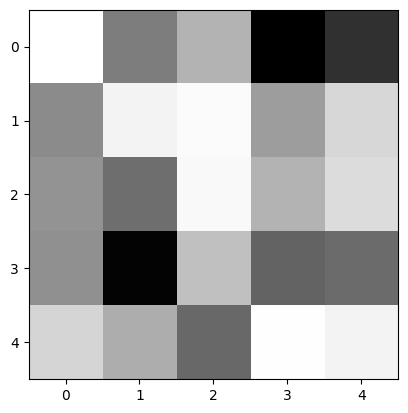

In [ ]:
def adjust_range(kernel):
    return (kernel + 1) / 2

kernel = W[0, 0, :, :]
adjusted_kernel = adjust_range(kernel.detach().numpy())
plt.imshow(adjusted_kernel, cmap='gray')

#24

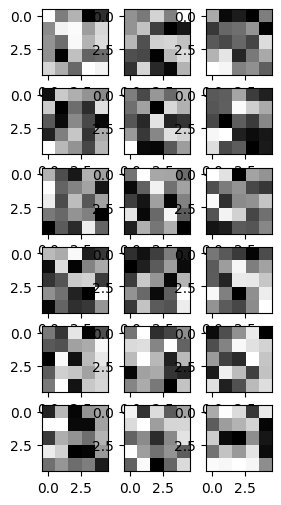

In [ ]:
fig = plt.figure(figsize=(3, 6))  # 3 columns, 6 rows
axx = fig.subplots(6, 3)

for i in range(6):
    for j in range(3):
        kernel = W[i, j, :, :]
        adjusted_kernel = adjust_range(kernel.detach().numpy())
        axx[i, j].imshow(adjusted_kernel, cmap='gray')
